In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("land_dataset.csv")
df.head()

,Land Record ID,Location,Area(sq ft),Type of Land,Current Usage,Ownership Type,Lease Information,Legal Status,Zoning Information,Easements,...,Relevant Documents,polygon,Unnamed: 16,state,District,current usage,Soil Quality,Water level,Land elevation,MSL
0,GLIS1233,vilage,82265.55,agricultural,farming,government,ABC agri ltd,no disputes,agriculture zone,none,...,lease agreement,"77.00028781059154, 11.0803107555833,77.0003284...",NaN,Tamilnadu,Coimbatore,Commercial land,1,7,11,2
1,GLIS1234,town,96532.69,residental,empty,government,NaN,no disputes,residental zone,none,...,district highway,"77.00452041210212, 11.084496776167597,77.0043...",NaN,Tamilnadu,Coimbatore,Residential land,3,6,2,3
2,GLIS1235,town,257612.77,residental,empty,government,NaN,no disputes,residental zone,none,...,survey map,"76.9934186841873, 11.079772040758229, 76.99...",NaN,Tamilnadu,Coimbatore,industrial land,5,8,5,2
3,GLIS1236,village,151719.33,commerical,industry,government,ABC industry.ltd,no disputes,commerical zone,none,...,Environmental clearance certificate,"76.99641714231325, 11.085738911407148, 76.9964...",NaN,Tamilnaddu,Coimbatore,agricultural land,2,5,9,3
4,GLIS1237,town,94848.15,commerical,empty,government,NaN,no disputes,commerical zone,none,...,survey map,"76.99432476243982,11.089931685445734,76.994450...",NaN,Tamilnadu,Coimbatore,non agricultural land,5,6,1,1


In [3]:
district=input("Enter the district:")
area=float(input("Enter the area size required:"))
filter_df=df[df["district"]==district]
land1=df["Area(sq ft)"].iloc[0]
land1

82265.55

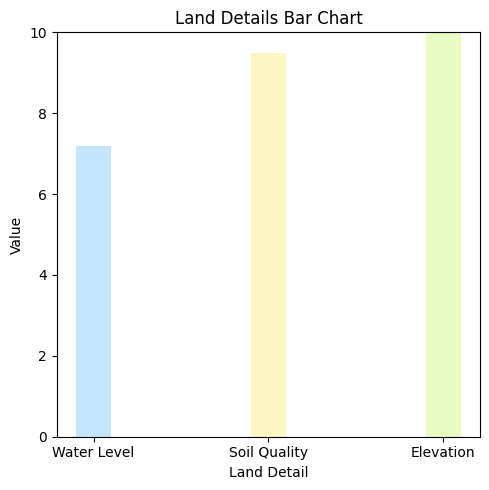

<Figure size 640x480 with 0 Axes>

In [1]:
import matplotlib.pyplot as plt
import io


#buffer to save the plot
buffer=io.BytesIO()


# Define the dictionary with land details
land_details = {
    "Water Level": 7.2,
    "Soil Quality": 9.5,
    "Elevation": 2500
}

bar_colors = ['#c3e6fc', '#fcf6c3', '#e6fcc3']
# Extract data for the bar chart
x_values = list(land_details.keys())
y_values = list(land_details.values())

# Create the bar chart
plt.figure(figsize=(5, 5))
plt.bar(x_values, y_values, width=0.2,color=bar_colors)

# Set chart labels and title
plt.xlabel("Land Detail")
plt.ylabel("Value")
plt.title("Land Details Bar Chart")

# Set y-axis limit from 0 to 10
plt.ylim(0, 10)

# Add grid and tight layout
plt.grid(False)
plt.tight_layout()
plt.savefig(buffer,format='png')
buffer.seek(0)

# Show the chart
plt.show()

#clear the plot for reuse
plt.clf()

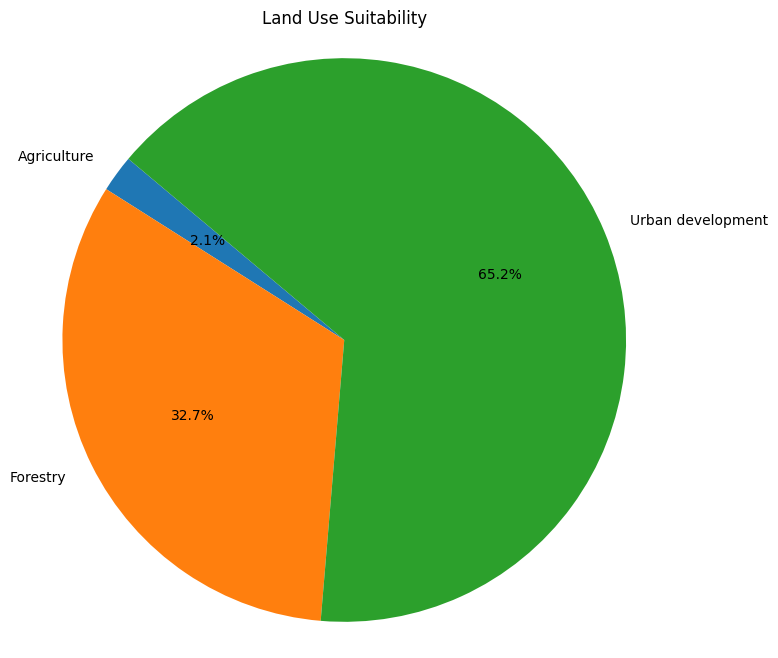

The most suitable land use is: Urban development


In [5]:
# Define land information
soil_quality = 3  # 1-5 scale
water_level = 2  # 1-5 scale
soil_type = "Sandy loam"  # Clay, Loam, Sandy loam
elevation = 100  # meters

# Define land use suitability scores
land_use_scores = {
    "Agriculture": (soil_quality * 0.5 + water_level * 0.3 + 0.2) * (1 if soil_type in ["Loam", "Sandy loam"] else 0.5),
    "Forestry": (soil_quality * 0.2 + water_level * 0.1 + elevation * 0.7) * (1 if soil_type in ["Clay", "Loam"] else 0.5),
    "Urban development": (soil_quality * 0.1 + water_level * 0.2 + elevation * 0.7) * (1 if soil_type in ["Sandy loam"] else 0.5),
}

# Calculate total score
total_score = sum(land_use_scores.values())

# Calculate land use percentages
land_use_percentages = {
    land_use: (land_use_scores[land_use] / total_score) * 100
    for land_use in land_use_scores
}

# Extract land use with highest percentage
highest_percentage_land_use = max(land_use_percentages, key=land_use_percentages.get)

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    land_use_percentages.values(),
    labels=land_use_percentages.keys(),
    autopct="%1.1f%%",
    startangle=140,
)
plt.title("Land Use Suitability")
plt.axis("equal")  # Equal aspect ratio ensures a circular pie chart
plt.show()

# Print the land use with the highest percentage
print(f"The most suitable land use is: {highest_percentage_land_use}")
